In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 

df = pd.read_csv('international-airline-passengers.csv')


In [ ]:
df.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df1 = df.set_index('Month')

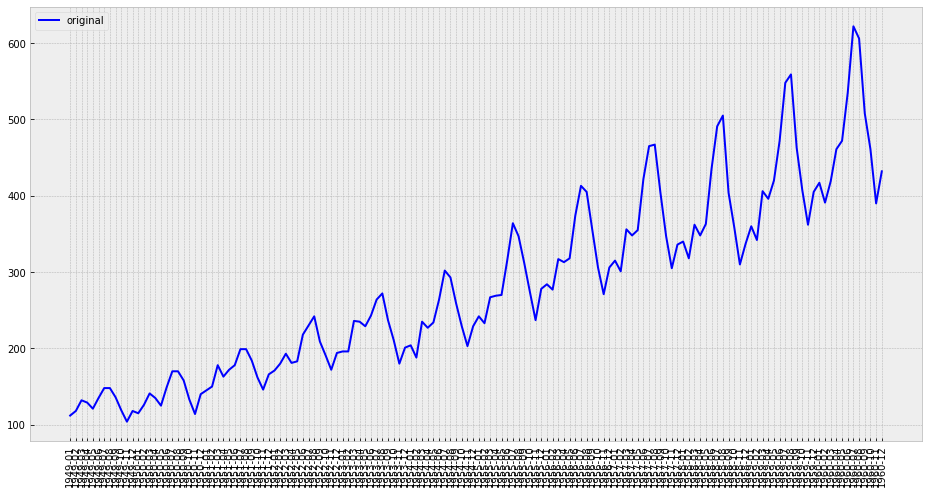

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(df1["Count"], color='blue',label='original')
    plt.xticks(rotation=90)
    plt.legend()

In [ ]:
from fbprophet import Prophet

predictions = 10

# приводим dataframe к нужному формату
#df = df.reset_index()

df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 10 точек, чтобы измерить на них качество
train_df = df[:-predictions] 

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30, freq='M')
forecast = m.predict(future)

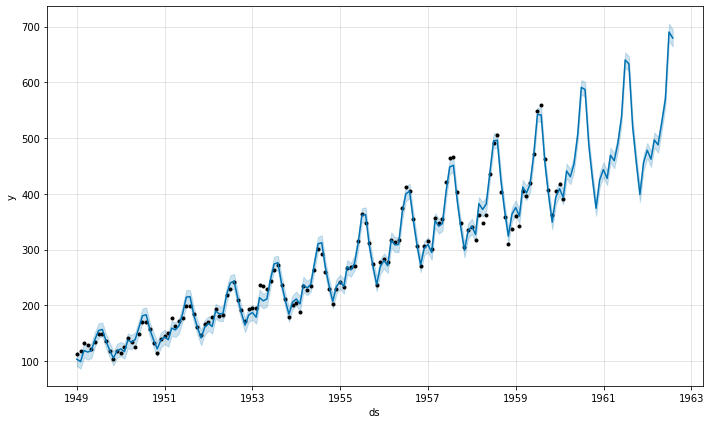

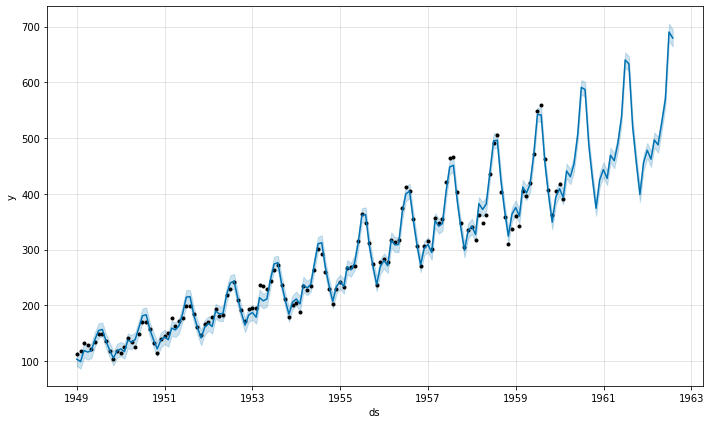

In [ ]:
m.plot(forecast)

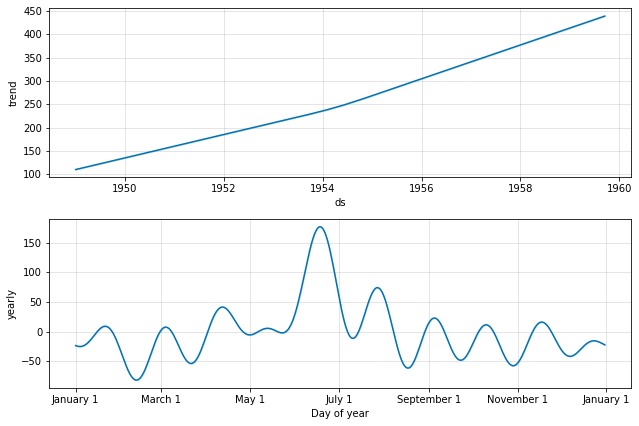

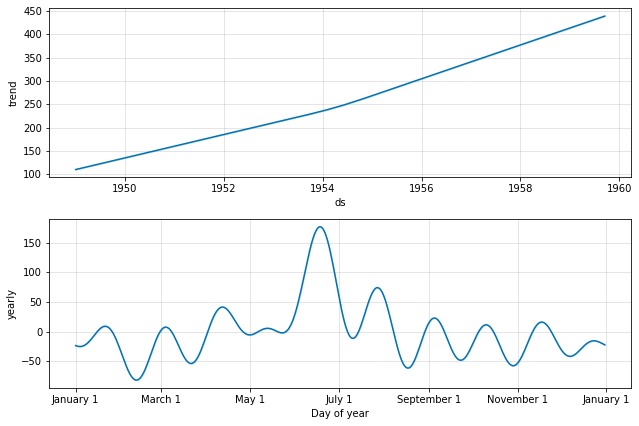

In [ ]:
m.plot_components(forecast)